# generate cut signal

In [3]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
# If you do not understand the lines above, ignore it.

import numpy as np
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import bilby
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from gwosc.locate import get_event_urls
from gwpy.signal import filter_design
import os
from bilby.core.prior import PriorDict


import sys
# sys.path.append("..")
# from modular_code_part.combmodel import combmodel as combmodel
# from modular_code_part.burstevidence_version4 import burstevidence2_response_notchout as burstevidence
sys.path.append("..")
from modular_code_part.burstevidence_newcomb import burstevidence2_old_response as burstevidence_old
from modular_code_part.burstevidence_newcomb import burstevidence2_qnm_response as burstevidence
from modular_code_part.comb_models_version3 import qnmcombmodel_cut as combmodel
from modular_code_part.notch import NotchFilterProcessor as NotchFilterProcessor
from modular_code_part.detresponse import RIeff as RIeff
from modular_code_part.detresponse import DtHL as DtHL

In [4]:
durationlist = np.array([48.6, 36.5, 24.3, 12.1, 4.9])
dt = 1 / 4096


## 24.3s

In [10]:
nduration = 2
duration = int(durationlist[nduration]/dt)*dt

echofile = '../signal/w1specM62Rw0.99Chi0.67Time25Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

In [11]:
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
# time_domain_echo_raw_shift = np.fft.ifft(strainfre_echo_raw)
len(time_domain_echo_raw),len(time_domain_echo_raw)-int(duration/dt)

(103155, 3623)

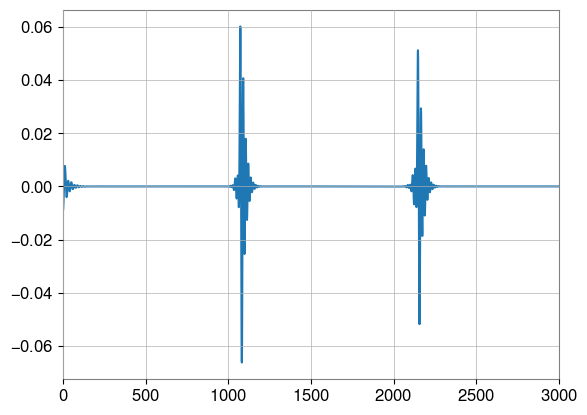

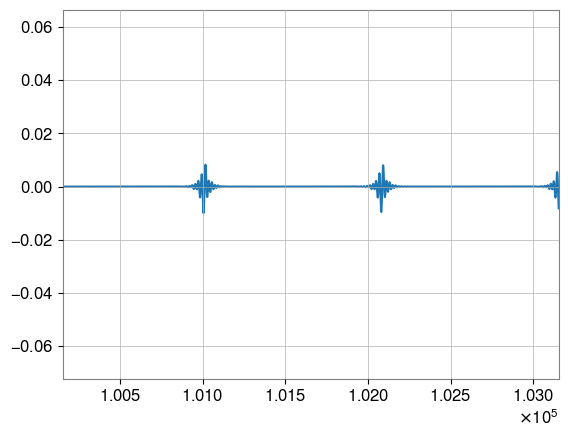

In [12]:
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,3000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-3000,len(time_domain_echo_raw))
plt.show()

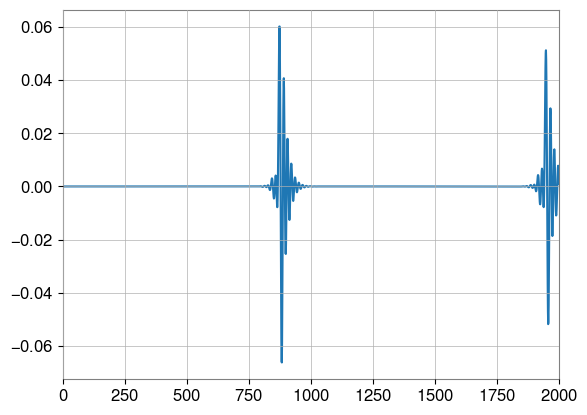

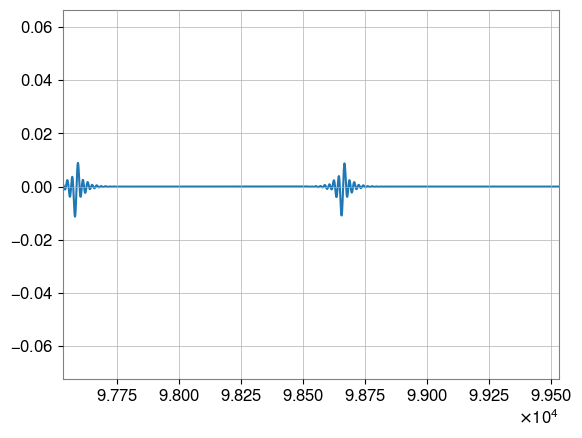

In [13]:
time_domain_echo_raw = time_domain_echo_raw[200:200+int(duration/dt)]

plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

In [14]:
len(time_domain_echo_raw),int(duration/dt),duration

(99532, 99532, 24.2998046875)

In [15]:
np.save('./time24.npy',time_domain_echo_raw)

## 48.6s

In [16]:
nduration = 0
duration = int(durationlist[nduration]/dt)*dt

echofile = '../signal/w1specM62Rw0.99Chi0.67Time50Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

In [17]:
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
# time_domain_echo_raw_shift = np.fft.ifft(strainfre_echo_raw)
len(time_domain_echo_raw),len(time_domain_echo_raw)-int(duration/dt)

(205235, 6170)

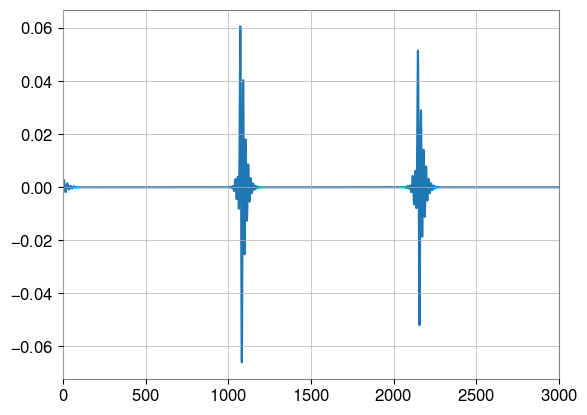

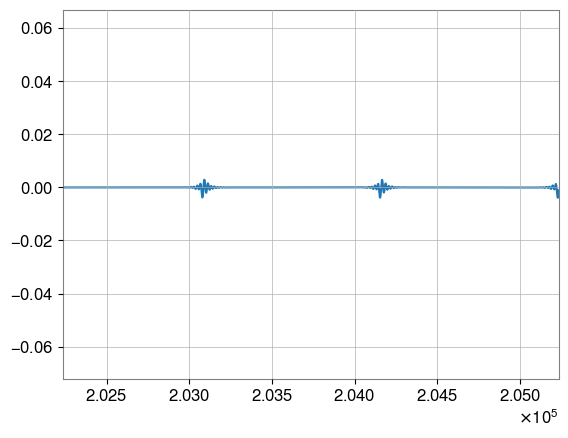

In [18]:
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,3000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-3000,len(time_domain_echo_raw))
plt.show()

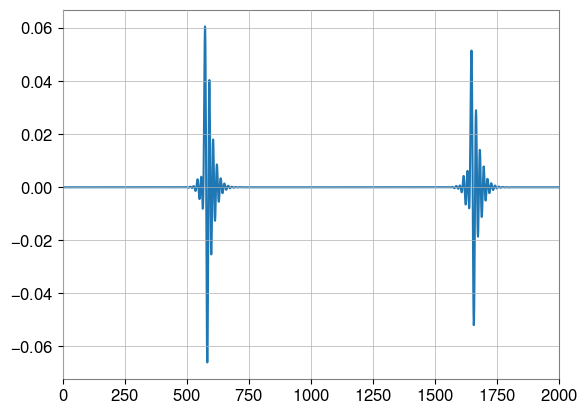

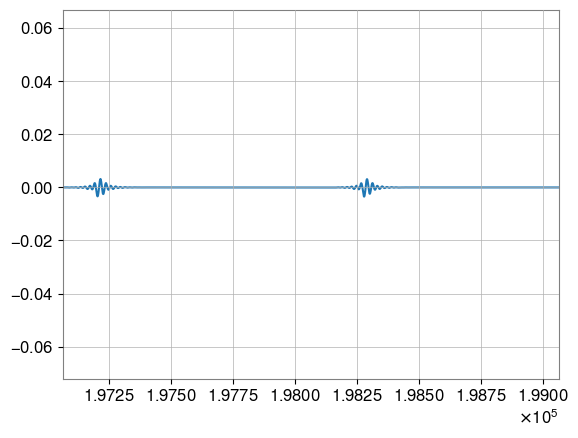

In [19]:
time_domain_echo_raw = time_domain_echo_raw[500:500+int(duration/dt)]

plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

In [20]:
len(time_domain_echo_raw),int(duration/dt),duration

(199065, 199065, 48.599853515625)

In [22]:
np.save('./time48.npy',time_domain_echo_raw)

## 36.5s

In [35]:
nduration = 1
duration = int(durationlist[nduration]/dt)*dt

echofile = '../signal/w1specM62Rw0.99Chi0.67Time37Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

In [37]:
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
# time_domain_echo_raw_shift = np.fft.ifft(strainfre_echo_raw)
len(time_domain_echo_raw),len(time_domain_echo_raw)-int(duration/dt)

(152583, 3079)

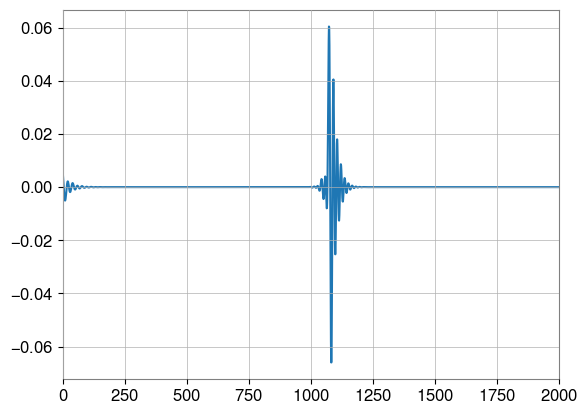

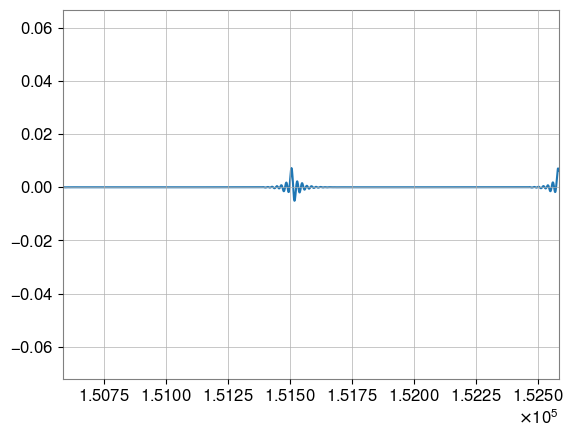

In [38]:
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

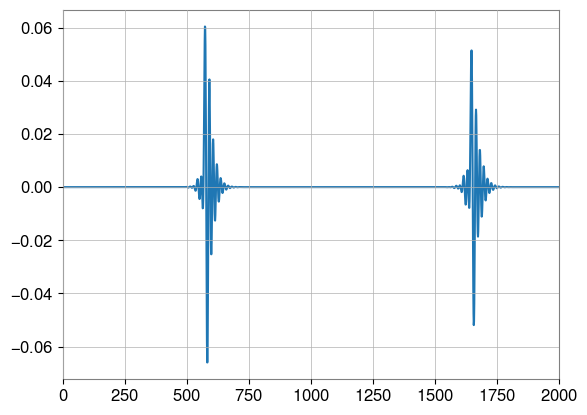

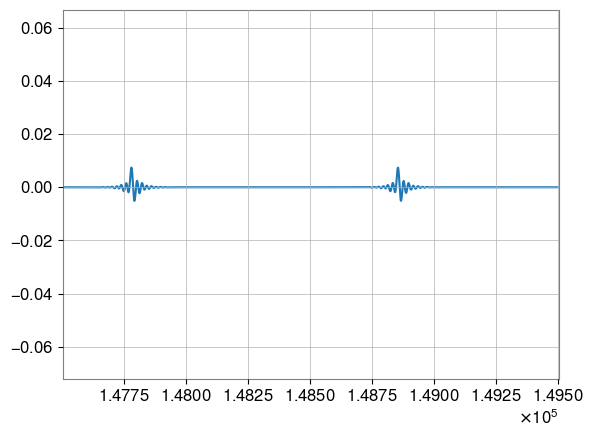

In [39]:
time_domain_echo_raw = time_domain_echo_raw[500:500+int(duration/dt)]

plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

In [40]:
len(time_domain_echo_raw),int(duration/dt),duration

(149504, 149504, 36.5)

In [41]:
np.save('../signal/time36.npy',time_domain_echo_raw)

## 12.1s

In [23]:
nduration = 3
duration = int(durationlist[nduration]/dt)*dt

echofile = '../signal/w1specM62Rw0.99Chi0.67Time13Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

In [24]:
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
# time_domain_echo_raw_shift = np.fft.ifft(strainfre_echo_raw)
len(time_domain_echo_raw),len(time_domain_echo_raw)-int(duration/dt)

(53727, 4166)

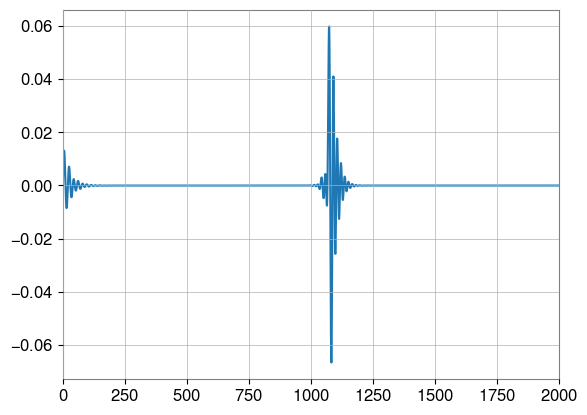

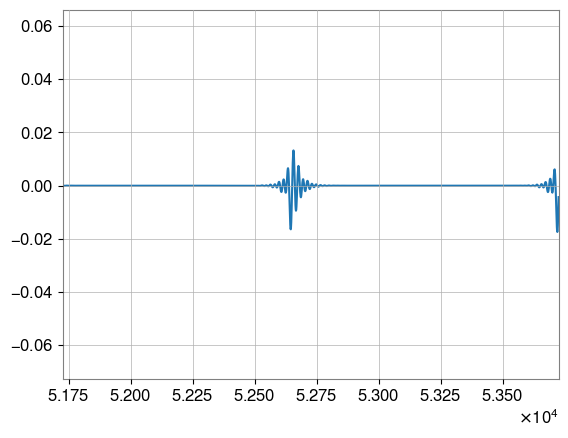

In [25]:
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

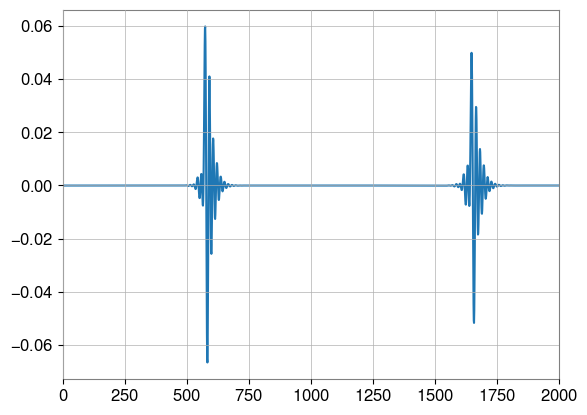

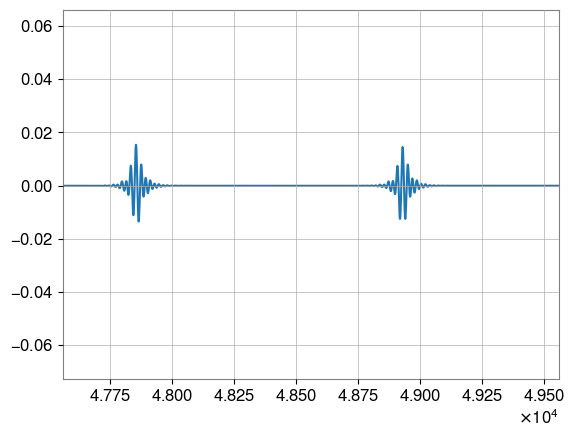

In [26]:
time_domain_echo_raw = time_domain_echo_raw[500:500+int(duration/dt)]

plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

In [27]:
len(time_domain_echo_raw),int(duration/dt),duration

(49561, 49561, 12.099853515625)

In [28]:
np.save('../signal/time12.npy',time_domain_echo_raw)

## 4.9s

In [29]:
nduration = 4
duration = int(durationlist[nduration]/dt)*dt

echofile = '../signal/w1specM62Rw0.99Chi0.67Time5Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

In [30]:
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
# time_domain_echo_raw_shift = np.fft.ifft(strainfre_echo_raw)
len(time_domain_echo_raw),len(time_domain_echo_raw)-int(duration/dt)

(21491, 1421)

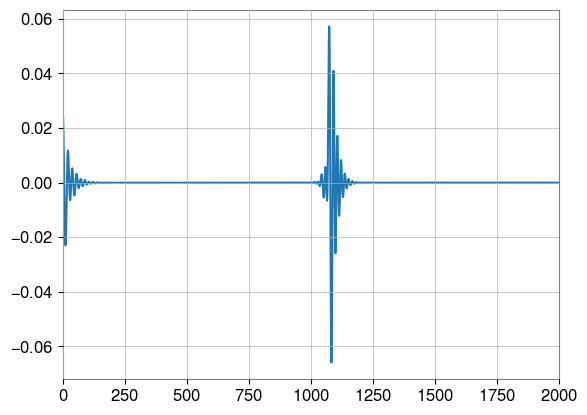

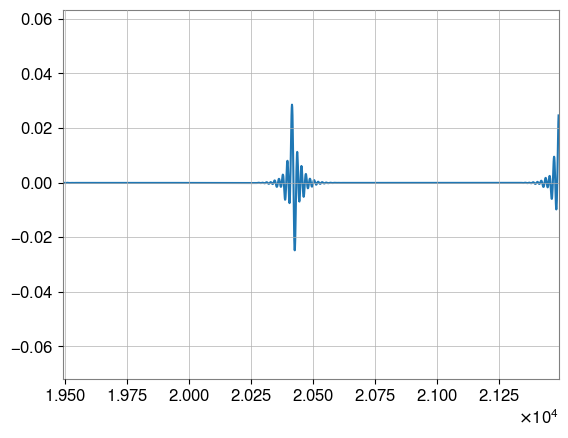

In [31]:
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

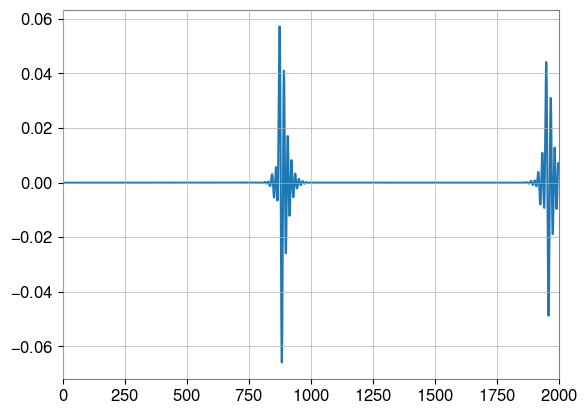

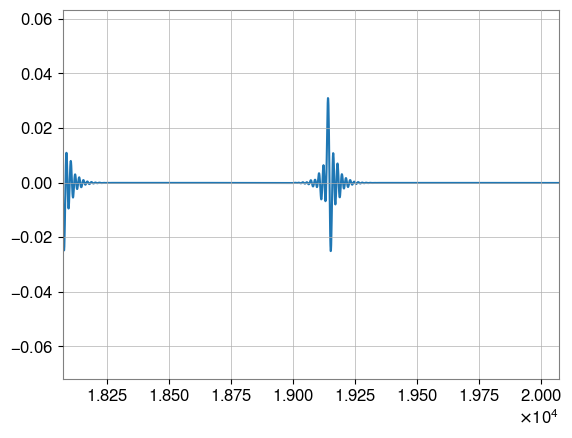

In [32]:
time_domain_echo_raw = time_domain_echo_raw[200:200+int(duration/dt)]

plt.plot(np.real(time_domain_echo_raw))
plt.xlim(0,2000)
plt.show()
plt.plot(np.real(time_domain_echo_raw))
plt.xlim(len(time_domain_echo_raw)-2000,len(time_domain_echo_raw))
plt.show()

In [33]:
len(time_domain_echo_raw),int(duration/dt),duration

(20070, 20070, 4.89990234375)

In [34]:
np.save('../signal/time5.npy',time_domain_echo_raw)

# draw frequency domain figure

In [1]:

import numpy as np
import matplotlib.mlab as mlab
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
echofile = '../signal/w1specM62Rw0.99Chi0.67Time50Python.dat'
inject_data = np.genfromtxt(echofile,delimiter="\t",dtype=np.complex128)

fre_echo_raw = np.fft.fftshift(np.real(inject_data[::,0]))
strainfre_echo_raw = np.fft.fftshift(np.conjugate(inject_data[::,1]))

dt = 1/4096
time_domain_echo_raw = np.fft.ifft(np.fft.fftshift(strainfre_echo_raw))
time_array = np.arange(0,len(time_domain_echo_raw)*dt,dt)

/tmp/ipykernel_3871875/2565749549.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2,1,1)


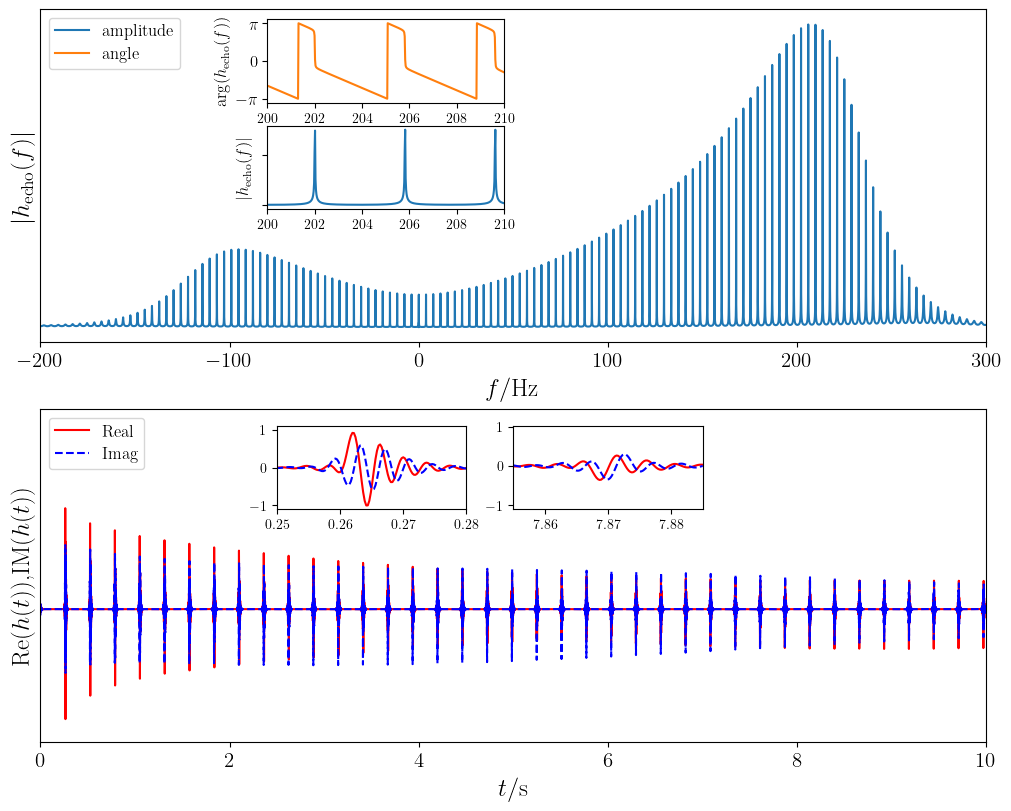

In [75]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig= plt.subplots(figsize = (10,8),constrained_layout=True)
ax = plt.subplot(2,1,1)
ax.plot(fre_echo_raw,np.abs(strainfre_echo_raw))
ax.set_xlim(-200,300)
ax.set_xlabel(r'$f/\mathrm{Hz}$',fontsize=18)
ax.set_ylabel(r'$|h_{\mathrm{echo}}(f)|$',fontsize=18)
# ax.set_xticks()
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(())
axin1 = ax.inset_axes([0.24, 0.72, 0.25, 0.25])
axin1.plot(fre_echo_raw,np.angle(strainfre_echo_raw),c='C1')
axin1.set_xlim(200,210)
axin1.set_yticks([-np.pi,0,np.pi])
axin1.set_yticklabels([r'$-\pi$',r'$0$',r'$\pi$'],fontsize=12)
axin1.set_ylabel(r'$\arg(h_{\mathrm{echo}}(f))$',fontsize=12)

axin2 = ax.inset_axes([0.24, 0.4, 0.25, 0.25])
axin2.plot(fre_echo_raw,np.abs(strainfre_echo_raw),c='C0')
axin2.set_xlim(200,210)
axin2.set_yticklabels([])
axin2.set_ylabel(r'$|h_{\mathrm{echo}}(f)|$',fontsize=12)

line1 = mlines.Line2D([], [], color='C0', label='amplitude')
line2 = mlines.Line2D([], [], color='C1', label=r'angle')
ax.legend(handles=[line1,line2],fontsize=12,loc='upper left')


ax = plt.subplot(2,1,2)
ax.plot(time_array,np.real(time_domain_echo_raw),c='r',ls='-',label='Real')
ax.plot(time_array,np.imag(time_domain_echo_raw),c='b',ls='--',label='Imag')
ax.set_xlim(0,10)
ax.set_ylim(-0.08,0.12)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks(())
ax.set_xlabel(r'$t/\mathrm{s}$',fontsize=18)
ax.set_ylabel(r'Re$(h(t))$,IM$(h(t))$',fontsize = 18)

normalized_factor = np.max(np.abs(np.real(time_domain_echo_raw)))
axin3 = ax.inset_axes((0.25, 0.7, 0.2, 0.25))
axin3.plot(time_array,np.real(time_domain_echo_raw)/normalized_factor,c='r',ls='-',label='Real')
axin3.plot(time_array,np.imag(time_domain_echo_raw)/normalized_factor,c='b',ls='--',label='Imag')
axin3.set_xlim(0.25,0.28)
axin3.set_ylim(-1.1,1.1)
# axin3.set_yticks(())
# axin3.set_yticklabels(())
# axin3.set_ylabel(r'$\arg(h_{\mathrm{echo}}(f))$',fontsize=12)
axin4 = ax.inset_axes((0.5, 0.7, 0.2, 0.25))
axin4.plot(time_array,np.real(time_domain_echo_raw)/normalized_factor,c='r',ls='-',label='Real')
axin4.plot(time_array,np.imag(time_domain_echo_raw)/normalized_factor,c='b',ls='--',label='Imag')
axin4.set_xlim(7.855,7.885)
axin3.set_ylim(-1.1,1.1)
# axin4.set_yticks(())
# axin4.set_yticklabels(())

line1 = mlines.Line2D([], [],c='r',ls='-',label='Real')
line2 = mlines.Line2D([], [],c='b',ls='--',label='Imag')
ax.legend(handles=[line1,line2],fontsize=12,loc='upper left')
plt.savefig('waveform.pdf',dpi=300)
plt.show()
plt.close()